# Домашнее задание 2. Классификация изображений.

В этом задании потребуется обучить классификатор изображений. Будем работать с датасетом, название которого раскрывать не будем. Можете посмотреть самостоятельно на картинки, которые в есть датасете. В нём 200 классов и около 5 тысяч картинок на каждый класс. Классы пронумерованы, как нетрудно догадаться, от 0 до 199. Скачать датасет можно вот [тут](https://yadi.sk/d/BNR41Vu3y0c7qA).

Структура датасета простая -- есть директории train/ и val/, в которых лежат обучающие и валидационные данные. В train/ и val/ лежат директориии, соответствующие классам изображений, в которых лежат, собственно, сами изображения.

__Задание__. Необходимо выполнить два задания

1) Добейтесь accuracy **на валидации не менее 0.44**. В этом задании **запрещено** пользоваться предобученными моделями и ресайзом картинок. 5 баллов

2) Добейтесь accuracy **на валидации не менее 0.84**. В этом задании делать ресайз и использовать претрейн можно. 5 баллов

Напишите краткий отчёт о проделанных экспериментах. Что сработало и что не сработало? Почему вы решили, сделать так, а не иначе? Обязательно указывайте ссылки на чужой код, если вы его используете. Обязательно ссылайтесь на статьи / блогпосты / вопросы на stackoverflow / видосы от ютуберов-машинлернеров / курсы / подсказки от Дяди Васи и прочие дополнительные материалы, если вы их используете.

Ваш код обязательно должен проходить все `assert`'ы ниже.

__Использовать внешние данные для обучения строго запрещено в обоих заданиях. Также запрещено обучаться на валидационной выборке__.


__Критерии оценки__: Оценка вычисляется по простой формуле: `min(10, 10 * Ваша accuracy / 0.44)` для первого задания и `min(10, 10 * (Ваша accuracy - 0.5) / 0.34)` для второго. Оценка округляется до десятых по арифметическим правилам.


__Советы и указания__:
 - Наверняка вам потребуется много гуглить о классификации и о том, как заставить её работать. Это нормально, все гуглят. Но не забывайте, что нужно быть готовым за скатанный код отвечать :)
 - Используйте аугментации. Для этого пользуйтесь модулем `torchvision.transforms` или библиотекой [albumentations](https://github.com/albumentations-team/albumentations)
 - Можно обучать с нуля или файнтюнить (в зависимости от задания) модели из `torchvision`.
 - Рекомендуем написать вам сначала класс-датасет (или воспользоваться классом `ImageFolder`), который возвращает картинки и соответствующие им классы, а затем функции для трейна по шаблонам ниже. Однако делать это мы не заставляем. Если вам так неудобно, то можете писать код в удобном стиле. Однако учтите, что чрезмерное изменение нижеперечисленных шаблонов увеличит количество вопросов к вашему коду и повысит вероятность вызова на защиту :)
 - Валидируйте. Трекайте ошибки как можно раньше, чтобы не тратить время впустую.
 - Чтобы быстро отладить код, пробуйте обучаться на маленькой части датасета (скажем, 5-10 картинок просто чтобы убедиться что код запускается). Когда вы поняли, что смогли всё отдебажить, переходите обучению по всему датасету
 - На каждый запуск делайте ровно одно изменение в модели/аугментации/оптимайзере, чтобы понять, что и как влияет на результат.
 - Фиксируйте random seed.
 - Начинайте с простых моделей и постепенно переходите к сложным. Обучение лёгких моделей экономит много времени.
 - Ставьте расписание на learning rate. Уменьшайте его, когда лосс на валидации перестаёт убывать.
 - Советуем использовать GPU. Если у вас его нет, используйте google colab. Если вам неудобно его использовать на постоянной основе, напишите и отладьте весь код локально на CPU, а затем запустите уже написанный ноутбук в колабе. Авторское решение задания достигает требуемой точности в колабе за 15 минут обучения.

Good luck & have fun! :)

In [1]:
!pip install wandb
!pip3 install pytorch_lightning torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.9/243.9 kB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 52.6 MB/s eta 0:00:00


**✨ Внимание ✨**

В этом домашнем задании предлагается использовать библиотеку `pytorch_lightning`. Доступ к ее [документации](https://lightning.ai/docs/pytorch/stable/) заблокирован с территории РФ. Вы можете:

1. Получить к ней доступ с помощью VPN.

2. Собрать документацию самостоятельно. Для этого склонируйте [github-репозиторий](https://github.com/Lightning-AI/lightning/tree/master), запустите в нем терминал (на windows – git bash) и выполните команды:

```shell
git submodule update --init --recursive
make docs
```
После этого откройте появившийся файл `docs/build/html/index.html`. Для работы команд в вашем окружении должен быть `pip`. Полная инструкция [по ссылке](https://github.com/Lightning-AI/lightning/tree/master/docs).

3. Гуглить `<error message> pytorch lightning` или `<how to do this> pytorch lightning`. Stack overflow на территории РФ все еще доступен 😉

4. Не пользоваться `pytorch_lightning` и написать цикл обучения модели самостоятельно. Например, по аналогии с функцией `fit` из [семинара 4](https://github.com/hse-ds/iad-deep-learning/blob/master/2023/seminars/04.%20Optim%20%26%20Lightning/04_Optim%26Lightning_solution.ipynb).

In [2]:
# Возможно ниже будет не очень работать WandbLogger с первого разу, перезапустите kernel тетрадки
import wandb

wandb.login()

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [3]:
import math
import os
import random
import sys

import matplotlib.pyplot as plt
import numpy as np
import pytorch_lightning as pl
import torch
import torchvision
import torchvision.transforms as transforms
from PIL import Image
from pytorch_lightning.loggers import WandbLogger
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torchmetrics.functional import accuracy
from torchvision.datasets import ImageFolder
from tqdm import tqdm
from torchvision.models import resnet18, ResNet18_Weights
import PIL
from torchvision.transforms import v2
from torchvision.models import swin_v2_s, Swin_V2_S_Weights

# You may add any imports you need

In [4]:
def seed_everything(seed):
    # Фискирует максимум сидов.
    # Это понадобится, чтобы сравнение оптимизаторов было корректным
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True


seed_everything(123456)

In [5]:
!wget https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=1 -O dataset.zip && unzip -q dataset.zip

--2023-11-12 06:24:37--  https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/33l8lp62rmvtx40/dataset.zip [following]
--2023-11-12 06:24:38--  https://www.dropbox.com/s/dl/33l8lp62rmvtx40/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0b567ff7dabc301786643285ee.dl.dropboxusercontent.com/cd/0/get/CHbObuUWeLXC29TfI0zYk5Gp-VidcR4TU2c-YXsJreVggRYZfvXyAEVRacBgcmefi2yMVcOSrlvaHmvrSnIpJ82_sPH_kz5Mz8sy0e8-gljZfOkrUJ9BcdAKZTaCLTDtvSdHXPNHVznnQEk1MmMy3FRD/file?dl=1# [following]
--2023-11-12 06:24:38--  https://uc0b567ff7dabc301786643285ee.dl.dropboxusercontent.com/cd/0/get/CHbObuUWeLXC29TfI0zYk5Gp-VidcR4TU2c-YXsJreVggRYZfvXyAEVRacBgcmefi2yMVcOSrlvaHmvrSnIpJ82_sPH_kz5Mz8sy

## Задание 0

### Что поможет сделать на 10 из 10 (одно задание - 5 баллов)

1. Использовать все возможные методы оптимизации и эксперемнтировать с ними.
2. Подбор learning rate. Пример из прошлого семинара как это делать: [Как найти lr](https://pytorch-lightning.readthedocs.io/en/1.4.5/advanced/lr_finder.html)

```
  trainer = pl.Trainer(accelerator="gpu", max_epochs=2, auto_lr_find=True)

  trainer.tune(module, train_dataloader, eval_dataloader)

  trainer.fit(module, train_dataloader, eval_dataloader))
```



3. Аугментация данных. [Документация (полезная)](https://pytorch.org/vision/main/transforms.html), а также [библиотека albumentation](https://towardsdatascience.com/getting-started-with-albumentation-winning-deep-learning-image-augmentation-technique-in-pytorch-47aaba0ee3f8)
4. Подбор архитектуры модели.
5. Можно написать модель руками свою в YourNet, а можно импортировать не предобученную сетку известной архитектуры из модуля torchvision.models. Один из способов как можно сделать:

  * `torchvision.models.resnet18(pretrained=False, num_classes=200).to(device)`
  * Документация по возможным моделям и как их можно брать: [Документация (полезная)](https://pytorch.org/vision/stable/models.html)
6. Правильно нормализовывать данные при создании, пример [тык, но тут и в целом гайд от и до](https://www.pluralsight.com/guides/image-classification-with-pytorch)
7. Model Checkpointing. Сохраняйте свой прогресс (модели), чтобы когда что-то пойдет не так вы сможете начать с этого места или просто воспроизвести свои результаты модели, которые обучали.
 * Пример как можно с wandb тут: [Сохраняем лучшие модели в wandb](https://docs.wandb.ai/guides/integrations/lightning)
 * По простому можно так: [Сохраняем модели в pytorch дока](https://pytorch.org/tutorials/beginner/saving_loading_models.html)

### Подготовка данных

Аугментация взята из [документации](https://pytorch.org/vision/main/transforms.html) (ресайз убран)

In [6]:
train_transform = v2.Compose([
    v2.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

val_transform = v2.Compose([
    transforms.ToTensor(),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dataset = ImageFolder('/content/dataset/dataset/train', transform=train_transform)
val_dataset = ImageFolder('/content/dataset/dataset/val', transform=val_transform)

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=64, shuffle=False)

In [7]:
# Just very simple sanity checks
assert isinstance(train_dataset[0], tuple)
assert len(train_dataset[0]) == 2
assert isinstance(train_dataset[1][1], int)
print("tests passed")

tests passed


### Посмотрим на картиночки

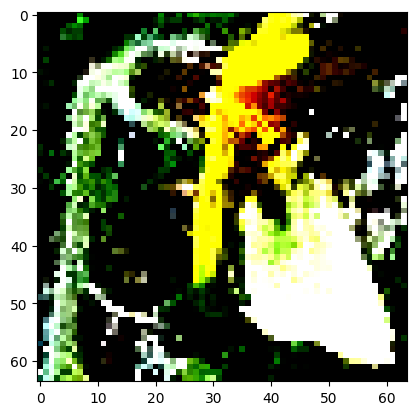

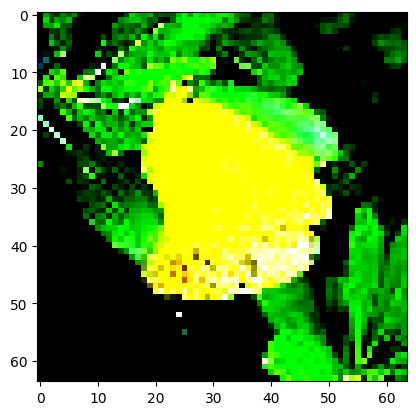

In [8]:
for batch in val_dataloader:
    images, class_nums = batch
    plt.imshow(images[5].permute(1, 2, 0))
    plt.show()
    plt.imshow(images[19].permute(1, 2, 0))
    plt.show()
    break

## Задание 1.

5 баллов
Добейтесь accuracy на валидации не менее 0.44. В этом задании запрещено пользоваться предобученными моделями и ресайзом картинок.


Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры можно (и нужно) использовать друг с другом. Однако когда что-то проверяете, то не меняйте несколько параметров сразу - собьете логику экспериментов
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались)
4. Посмотреть все ноутбуки прошедших семинаров и слепить из них что-то общее. Семинарских тетрадок хватит сверх

### Модель (или просто импортируйте не предобученную)

Хочу попробовать модель resnet18 (как в 5-м семинаре), но у нее нет аттрибута get_accuracy (также для в ее forward'е 2 позиционных аргумента, а не 3 как в разделе "Валидация результатов задания"), поэтому будем работать с классом YourNet, запихнув туда resnet18. Написание класса нейросети взято с 4-го семинара.

In [9]:
class YourNet(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.model = resnet18(num_classes=200) # pretrained здесь False, чтобы не было warning'а уберем это
        self.loss_func = torch.nn.CrossEntropyLoss()
        self.targets = torch.Tensor()
        self.preds = torch.Tensor()

    def _forward(self, x):
        # runs the Neural Network
        return self.model(x)

    def forward(self, images, target=None):
        output = self._forward(images)

        if target is not None: # типо если сейчас этап валидации, то будем считать accuracy
            loss = self.loss_func(output, target)

            self.targets = torch.cat((self.targets, target.cpu()), 0)
            pred = torch.argmax(output, dim=-1)
            self.preds = torch.cat((self.preds, pred.cpu()), 0)
            self.accuracy = accuracy(self.preds.long(), self.targets.long(), task='multiclass', num_classes=200)

        return loss if target is not None else output

    def get_accuracy(self, reset=False):
        if reset:
            self.targets = torch.Tensor()
            self.preds = torch.Tensor()
        return self.accuracy

### Тренировочный класс lightning

Lightning написан, как в 4-м семинаре

In [10]:
def evaluate_task(model, test_dataloader, device="cuda:0"):
    model = model.to(device)
    model.eval()
    accuracy = 0.0
    for images, labels in tqdm(test_dataloader):
        images, labels = images.to(device), labels.to(device)
        with torch.no_grad():
            loss = model(images, labels)
            acc_batch = model.get_accuracy(reset=True)
        accuracy += acc_batch
    accuracy = accuracy / len(test_dataloader)
    return accuracy

In [11]:
class YourModule(pl.LightningModule):
    def __init__(self, model, learning_rate):
        super().__init__()
        self.model = model
        self.learning_rate = learning_rate

    def forward(self, x):
        result = self.model(x)
        return result

    def configure_optimizers(self):
        lambda_func = lambda epoch: 0.75**epoch # сдержим adam от проскакивания минимума, сделаем шаги поменьше у минимума
        optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate)
        scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda_func)

        return [optimizer], [scheduler]

    def training_step(self, train_batch, batch_idx):
        images, target = train_batch
        loss = self.model(images, target)
        self.log("train_loss", loss, prog_bar=True)
        return loss

    def validation_step(self, val_batch, batch_idx):
        images, target = val_batch
        loss = self.model(images, target)
        self.log("val_loss", loss, prog_bar=True)

    def on_validation_epoch_end(self):
        self.log("val_accuracy", evaluate_task(self.model, val_dataloader), prog_bar=True) # будем смотреть как меняется accuracy после каждой эпохи

In [12]:
wandb_logger = WandbLogger(log_model='all', project='hw2_ishkinin') # какие возможности дает с pytorch_lightning https://docs.wandb.ai/guides/integrations/lightning
device = "cuda" if torch.cuda.is_available() else "cpu"

seed_everything(123456)
model = YourNet().to(device)
module = YourModule(model, learning_rate=0.0005)

In [13]:
trainer = pl.Trainer(logger=wandb_logger, accelerator="gpu", max_epochs=9)
trainer.fit(module, train_dataloader, val_dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
wandb: Currently logged in as: dsishkinin (daniel18). Use `wandb login --relogin` to force relogin


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type    | Params
----------------------------------
0 | model | YourNet | 11.3 M
----------------------------------
11.3 M    Trainable params
0         Non-trainable params
11.3 M    Total params
45.116    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.

100%|██████████| 157/157 [00:09<00:00, 16.90it/s]
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]



  0%|          | 0/157 [00:00<?, ?it/s]

  1%|▏         | 2/157 [00:00<00:07, 19.62it/s]

  3%|▎         | 5/157 [00:00<00:07, 20.99it/s]

  5%|▌         | 8/157 [00:00<00:07, 20.95it/s]

  7%|▋         | 11/157 [00:00<00:06, 20.95it/s]

  9%|▉         | 14/157 [00:00<00:06, 21.16it/s]

 11%|█         | 17/157 [00:00<00:06, 21.28it/s]

 13%|█▎        | 20/157 [00:00<00:06, 21.14it/s]

 15%|█▍        | 23/157 [00:01<00:06, 21.00it/s]

 17%|█▋        | 26/157 [00:01<00:06, 21.22it/s]

 18%|█▊        | 29/157 [00:01<00:06, 21.33it/s]

 20%|██        | 32/157 [00:01<00:05, 21.50it/s]

 22%|██▏       | 35/157 [00:01<00:05, 21.69it/s]

 24%|██▍       | 38/157 [00:01<00:05, 21.49it/s]

 26%|██▌       | 41/157 [00:01<00:05, 21.22it/s]

 28%|██▊       | 44/157 [00:02<00:05, 21.33it/s]

 30%|██▉       | 47/157 [00:02<00:05, 20.83it/s]

 32%|███▏      | 50/157 [00:02<00:05, 21.22it/s]

 34%|███▍      | 53/157 [00:02<00:04, 21.41it/s]

 36%|███▌      | 56/157 [00:02<00:04, 21.53it/s]

 38%|███▊ 

Validation: |          | 0/? [00:00<?, ?it/s]



  0%|          | 0/157 [00:00<?, ?it/s]

  1%|▏         | 2/157 [00:00<00:09, 16.16it/s]

  3%|▎         | 4/157 [00:00<00:09, 16.33it/s]

  4%|▍         | 6/157 [00:00<00:09, 16.70it/s]

  5%|▌         | 8/157 [00:00<00:08, 16.61it/s]

  6%|▋         | 10/157 [00:00<00:08, 16.70it/s]

  8%|▊         | 12/157 [00:00<00:08, 16.19it/s]

  9%|▉         | 14/157 [00:00<00:08, 16.50it/s]

 10%|█         | 16/157 [00:00<00:08, 16.39it/s]

 11%|█▏        | 18/157 [00:01<00:08, 16.16it/s]

 13%|█▎        | 20/157 [00:01<00:08, 16.36it/s]

 14%|█▍        | 22/157 [00:01<00:08, 16.35it/s]

 15%|█▌        | 24/157 [00:01<00:08, 15.90it/s]

 17%|█▋        | 26/157 [00:01<00:08, 15.76it/s]

 18%|█▊        | 28/157 [00:01<00:08, 15.58it/s]

 19%|█▉        | 30/157 [00:01<00:08, 15.41it/s]

 20%|██        | 32/157 [00:02<00:08, 15.21it/s]

 22%|██▏       | 34/157 [00:02<00:08, 15.07it/s]

 23%|██▎       | 36/157 [00:02<00:07, 15.41it/s]

 24%|██▍       | 38/157 [00:02<00:07, 15.73it/s]

 25%|██▌   

Validation: |          | 0/? [00:00<?, ?it/s]



  0%|          | 0/157 [00:00<?, ?it/s]

  2%|▏         | 3/157 [00:00<00:07, 21.69it/s]

  4%|▍         | 6/157 [00:00<00:06, 21.75it/s]

  6%|▌         | 9/157 [00:00<00:07, 20.45it/s]

  8%|▊         | 12/157 [00:00<00:06, 20.90it/s]

 10%|▉         | 15/157 [00:00<00:06, 21.06it/s]

 11%|█▏        | 18/157 [00:00<00:06, 20.99it/s]

 13%|█▎        | 21/157 [00:00<00:06, 21.24it/s]

 15%|█▌        | 24/157 [00:01<00:06, 21.44it/s]

 17%|█▋        | 27/157 [00:01<00:06, 21.38it/s]

 19%|█▉        | 30/157 [00:01<00:06, 21.06it/s]

 21%|██        | 33/157 [00:01<00:05, 20.90it/s]

 23%|██▎       | 36/157 [00:01<00:05, 20.48it/s]

 25%|██▍       | 39/157 [00:01<00:05, 20.33it/s]

 27%|██▋       | 42/157 [00:02<00:05, 20.12it/s]

 29%|██▊       | 45/157 [00:02<00:05, 20.07it/s]

 31%|███       | 48/157 [00:02<00:05, 20.17it/s]

 32%|███▏      | 51/157 [00:02<00:05, 20.31it/s]

 34%|███▍      | 54/157 [00:02<00:05, 20.44it/s]

 36%|███▋      | 57/157 [00:02<00:04, 20.33it/s]

 38%|███▊ 

Validation: |          | 0/? [00:00<?, ?it/s]



  0%|          | 0/157 [00:00<?, ?it/s]

  1%|▏         | 2/157 [00:00<00:09, 17.03it/s]

  3%|▎         | 4/157 [00:00<00:09, 16.87it/s]

  4%|▍         | 6/157 [00:00<00:08, 16.85it/s]

  5%|▌         | 8/157 [00:00<00:09, 15.97it/s]

  6%|▋         | 10/157 [00:00<00:09, 16.09it/s]

  8%|▊         | 12/157 [00:00<00:09, 16.09it/s]

  9%|▉         | 14/157 [00:00<00:09, 15.86it/s]

 10%|█         | 16/157 [00:01<00:08, 15.83it/s]

 11%|█▏        | 18/157 [00:01<00:08, 15.58it/s]

 13%|█▎        | 20/157 [00:01<00:08, 15.77it/s]

 14%|█▍        | 22/157 [00:01<00:08, 15.71it/s]

 15%|█▌        | 24/157 [00:01<00:08, 15.68it/s]

 17%|█▋        | 26/157 [00:01<00:08, 15.88it/s]

 18%|█▊        | 28/157 [00:01<00:08, 15.82it/s]

 19%|█▉        | 30/157 [00:01<00:07, 15.89it/s]

 20%|██        | 32/157 [00:02<00:07, 16.06it/s]

 22%|██▏       | 34/157 [00:02<00:07, 15.96it/s]

 23%|██▎       | 36/157 [00:02<00:07, 15.62it/s]

 24%|██▍       | 38/157 [00:02<00:07, 15.68it/s]

 25%|██▌   

Validation: |          | 0/? [00:00<?, ?it/s]



  0%|          | 0/157 [00:00<?, ?it/s]

  1%|▏         | 2/157 [00:00<00:09, 16.68it/s]

  3%|▎         | 4/157 [00:00<00:09, 16.52it/s]

  4%|▍         | 6/157 [00:00<00:09, 16.04it/s]

  5%|▌         | 8/157 [00:00<00:08, 16.57it/s]

  6%|▋         | 10/157 [00:00<00:08, 16.80it/s]

  8%|▊         | 12/157 [00:00<00:08, 17.02it/s]

  9%|▉         | 14/157 [00:00<00:08, 16.85it/s]

 10%|█         | 16/157 [00:00<00:08, 16.86it/s]

 11%|█▏        | 18/157 [00:01<00:08, 16.61it/s]

 13%|█▎        | 20/157 [00:01<00:08, 16.69it/s]

 14%|█▍        | 22/157 [00:01<00:08, 16.34it/s]

 15%|█▌        | 24/157 [00:01<00:08, 15.71it/s]

 17%|█▋        | 26/157 [00:01<00:08, 15.64it/s]

 18%|█▊        | 28/157 [00:01<00:08, 15.65it/s]

 19%|█▉        | 30/157 [00:01<00:07, 15.92it/s]

 20%|██        | 32/157 [00:01<00:07, 15.94it/s]

 22%|██▏       | 34/157 [00:02<00:07, 15.97it/s]

 23%|██▎       | 36/157 [00:02<00:07, 15.82it/s]

 24%|██▍       | 38/157 [00:02<00:07, 15.82it/s]

 25%|██▌   

Validation: |          | 0/? [00:00<?, ?it/s]



  0%|          | 0/157 [00:00<?, ?it/s]

  1%|▏         | 2/157 [00:00<00:09, 16.84it/s]

  3%|▎         | 4/157 [00:00<00:10, 15.20it/s]

  4%|▍         | 6/157 [00:00<00:09, 15.79it/s]

  5%|▌         | 8/157 [00:00<00:09, 15.38it/s]

  6%|▋         | 10/157 [00:00<00:09, 15.76it/s]

  8%|▊         | 12/157 [00:00<00:09, 15.95it/s]

  9%|▉         | 14/157 [00:00<00:08, 16.36it/s]

 10%|█         | 16/157 [00:00<00:08, 16.35it/s]

 11%|█▏        | 18/157 [00:01<00:08, 16.22it/s]

 13%|█▎        | 20/157 [00:01<00:09, 14.72it/s]

 14%|█▍        | 22/157 [00:01<00:09, 14.40it/s]

 15%|█▌        | 24/157 [00:01<00:09, 13.92it/s]

 17%|█▋        | 26/157 [00:01<00:09, 13.42it/s]

 18%|█▊        | 28/157 [00:01<00:09, 13.88it/s]

 19%|█▉        | 30/157 [00:02<00:08, 14.42it/s]

 20%|██        | 32/157 [00:02<00:08, 14.51it/s]

 22%|██▏       | 34/157 [00:02<00:08, 14.62it/s]

 23%|██▎       | 36/157 [00:02<00:08, 15.07it/s]

 24%|██▍       | 38/157 [00:02<00:07, 15.51it/s]

 25%|██▌   

Validation: |          | 0/? [00:00<?, ?it/s]



  0%|          | 0/157 [00:00<?, ?it/s]

  1%|▏         | 2/157 [00:00<00:10, 15.12it/s]

  3%|▎         | 4/157 [00:00<00:09, 15.62it/s]

  4%|▍         | 6/157 [00:00<00:09, 15.18it/s]

  5%|▌         | 8/157 [00:00<00:09, 15.09it/s]

  6%|▋         | 10/157 [00:00<00:09, 15.24it/s]

  8%|▊         | 12/157 [00:00<00:09, 15.14it/s]

  9%|▉         | 14/157 [00:00<00:09, 15.16it/s]

 10%|█         | 16/157 [00:01<00:09, 15.29it/s]

 11%|█▏        | 18/157 [00:01<00:09, 15.26it/s]

 13%|█▎        | 20/157 [00:01<00:08, 15.30it/s]

 14%|█▍        | 22/157 [00:01<00:09, 14.97it/s]

 15%|█▌        | 24/157 [00:01<00:08, 15.20it/s]

 17%|█▋        | 27/157 [00:01<00:07, 17.11it/s]

 19%|█▉        | 30/157 [00:01<00:06, 18.34it/s]

 21%|██        | 33/157 [00:02<00:06, 19.26it/s]

 22%|██▏       | 35/157 [00:02<00:06, 19.35it/s]

 24%|██▍       | 38/157 [00:02<00:05, 19.96it/s]

 26%|██▌       | 41/157 [00:02<00:05, 20.41it/s]

 28%|██▊       | 44/157 [00:02<00:05, 20.28it/s]

 30%|██▉   

Validation: |          | 0/? [00:00<?, ?it/s]



  0%|          | 0/157 [00:00<?, ?it/s]

  2%|▏         | 3/157 [00:00<00:06, 22.92it/s]

  4%|▍         | 6/157 [00:00<00:07, 21.00it/s]

  6%|▌         | 9/157 [00:00<00:07, 20.88it/s]

  8%|▊         | 12/157 [00:00<00:06, 20.95it/s]

 10%|▉         | 15/157 [00:00<00:06, 21.05it/s]

 11%|█▏        | 18/157 [00:00<00:06, 20.77it/s]

 13%|█▎        | 21/157 [00:01<00:06, 20.92it/s]

 15%|█▌        | 24/157 [00:01<00:06, 21.03it/s]

 17%|█▋        | 27/157 [00:01<00:06, 20.72it/s]

 19%|█▉        | 30/157 [00:01<00:06, 21.12it/s]

 21%|██        | 33/157 [00:01<00:05, 21.37it/s]

 23%|██▎       | 36/157 [00:01<00:05, 21.43it/s]

 25%|██▍       | 39/157 [00:01<00:05, 21.44it/s]

 27%|██▋       | 42/157 [00:01<00:05, 21.41it/s]

 29%|██▊       | 45/157 [00:02<00:05, 21.17it/s]

 31%|███       | 48/157 [00:02<00:05, 20.96it/s]

 32%|███▏      | 51/157 [00:02<00:05, 20.57it/s]

 34%|███▍      | 54/157 [00:02<00:04, 20.66it/s]

 36%|███▋      | 57/157 [00:02<00:04, 20.81it/s]

 38%|███▊ 

Validation: |          | 0/? [00:00<?, ?it/s]



  0%|          | 0/157 [00:00<?, ?it/s]

  1%|▏         | 2/157 [00:00<00:09, 15.52it/s]

  3%|▎         | 4/157 [00:00<00:09, 15.56it/s]

  4%|▍         | 6/157 [00:00<00:09, 15.62it/s]

  5%|▌         | 8/157 [00:00<00:09, 15.82it/s]

  6%|▋         | 10/157 [00:00<00:09, 16.14it/s]

  8%|▊         | 12/157 [00:00<00:09, 15.64it/s]

  9%|▉         | 14/157 [00:00<00:09, 15.25it/s]

 10%|█         | 16/157 [00:01<00:09, 15.32it/s]

 11%|█▏        | 18/157 [00:01<00:08, 15.69it/s]

 13%|█▎        | 20/157 [00:01<00:08, 15.47it/s]

 14%|█▍        | 22/157 [00:01<00:08, 15.72it/s]

 15%|█▌        | 24/157 [00:01<00:08, 15.56it/s]

 17%|█▋        | 26/157 [00:01<00:08, 15.97it/s]

 18%|█▊        | 28/157 [00:01<00:08, 15.94it/s]

 19%|█▉        | 30/157 [00:01<00:07, 16.00it/s]

 20%|██        | 32/157 [00:02<00:07, 16.04it/s]

 22%|██▏       | 34/157 [00:02<00:07, 15.47it/s]

 23%|██▎       | 36/157 [00:02<00:07, 15.76it/s]

 24%|██▍       | 38/157 [00:02<00:07, 15.83it/s]

 25%|██▌   

### Валидация результатов задания

In [14]:
#model = # Подгрузить свою сохраненную модель сюда
acc = evaluate_task(model, val_dataloader)
print(f"Оценка за это задание составит {np.clip(10 * acc / 0.44, 0, 10):.2f} баллов")

100%|██████████| 157/157 [00:08<00:00, 18.69it/s]

Оценка за это задание составит 9.13 баллов


In [15]:
print(f"Accuracy = {acc}")

Accuracy = 0.4017714858055115


In [16]:
wandb.finish()

epoch,▁▁▁▁▁▂▂▂▂▃▃▃▃▃▄▄▄▄▅▅▅▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇████
train_loss,██▇▆▅▅▅▄▅▅▄▄▅▅▄▃▃▄▄▃▄▄▃▄▂▃▂▂▂▃▂▁▂▂▂▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
val_accuracy,▁▃▅▆▇▇███
val_loss,█▆▃▂▁▁▁▁▁
epoch,8
train_loss,1.47948
trainer/global_step,14066
val_accuracy,0.40191
val_loss,2.63277


## Задание 2

5 баллов
Добейтесь accuracy на валидации не менее 0.84. В этом задании делать ресайз и использовать претрейн можно.

Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры можно (и нужно) использовать друг с другом. Однако когда что-то проверяете, то не меняйте несколько параметров сразу - собьете логику экспериментов
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались или можете пойти дальше).
4. Попробуйте сначала посмотреть качество исходной модели без дообучения, сохраните как baseline. Отсюда поймете какие слои нужно дообучать.
5. Посмотреть все ноутбуки прошедших семинаров и слепить из них что-то общее. Семинарских тетрадок хватит сверх

### Модель (или просто импортируйте предобученную)

In [17]:
train_transform = v2.Compose([
    Swin_V2_S_Weights.IMAGENET1K_V1.transforms()
])

val_transform = v2.Compose([
    Swin_V2_S_Weights.IMAGENET1K_V1.transforms()
])

train_dataset = ImageFolder('/content/dataset/dataset/train', transform=train_transform)
val_dataset = ImageFolder('/content/dataset/dataset/val', transform=val_transform)

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=64, shuffle=False)

In [18]:
device = "cuda" if torch.cuda.is_available() else "cpu"
seed_everything(123456)
model = swin_v2_s(weights=Swin_V2_S_Weights.IMAGENET1K_V1).to(device)

Downloading: "https://download.pytorch.org/models/swin_v2_s-637d8ceb.pth" to /root/.cache/torch/hub/checkpoints/swin_v2_s-637d8ceb.pth
100%|██████████| 191M/191M [00:14<00:00, 14.2MB/s]


### Тренировочный класс lightning

Здесь написание своего класса для модели мне уже не помогло, т.к. возникают проблемы с перемножением матриц. Таким образом, мне ничего не осталось, кроме как чуть-чуть изменить функцию evaluate_task, считая accuracy встроенной функцией.

In [19]:
def evaluate_task(model, test_dataloader, device="cuda:0"):
    model = model.to(device)
    model.eval()
    val_accuracy = 0.0
    for images, labels in tqdm(test_dataloader):
        images, labels = images.to(device), labels.to(device)
        with torch.no_grad():
            acc_batch = accuracy(torch.argmax(model(images), dim=-1).long(), labels.long(), task = 'multiclass', num_classes=200)
        val_accuracy += acc_batch
    val_accuracy = val_accuracy / len(test_dataloader)
    return val_accuracy.cpu()

In [20]:
'''
# этот YourModule я использовал для первых трех экспериментов
class YourModule(pl.LightningModule):
    def __init__(self, model, learning_rate) -> None:
        super().__init__()
        self.learning_rate = learning_rate
        self.model = model
        self.model.fc = nn.Linear(512, 200)

        self.model_without_fc = resnet18(pretrained=True).to(device)
        self.model_without_fc.fc = nn.Identity() # Замена последнего слоя на asis преобразование -> получим модель со всеми слоями кроме последнего

        lambda_func = lambda epoch: 0.75**epoch
        self.optimizer = torch.optim.Adam(self.model.fc.parameters(), lr=self.learning_rate) # Задаем оптимизатор для последнего слоя (только его учим)
        self.scheduler = torch.optim.lr_scheduler.LambdaLR(self.optimizer, lr_lambda=lambda_func)

        self.loss = nn.CrossEntropyLoss()

    def forward(self, x) -> torch.Tensor:
        with torch.no_grad():
            features = self.model_without_fc(x)
        preds = self.model.fc(features) # Последний слой
        return preds

    def configure_optimizers(self):
        return [self.optimizer], [self.scheduler]

    def training_step(self, train_batch, batch_idx) -> torch.Tensor:
        images, target = train_batch
        preds = self.forward(images)
        loss = self.loss(preds, target)
        self.log("train_loss", loss, prog_bar=True)
        return loss

    def validation_step(self, val_batch, batch_idx) -> None:
        images, target = val_batch
        preds = self.forward(images)
        loss = self.loss(preds, target)
        self.log("val_loss", loss, prog_bar=True)

    def on_validation_epoch_end(self):
        self.log("val_accuracy", evaluate_task(self.model, val_dataloader), prog_bar=True) # будем смотреть как меняется accuracy после каждой эпохи
'''

'\n# этот YourModule я использовал для первых трех экспериментов\nclass YourModule(pl.LightningModule):\n    def __init__(self, model, learning_rate) -> None:\n        super().__init__()\n        self.learning_rate = learning_rate\n        self.model = model\n        self.model.fc = nn.Linear(512, 200)\n\n        self.model_without_fc = resnet18(pretrained=True).to(device)\n        self.model_without_fc.fc = nn.Identity() # Замена последнего слоя на asis преобразование -> получим модель со всеми слоями кроме последнего\n\n        lambda_func = lambda epoch: 0.75**epoch\n        self.optimizer = torch.optim.Adam(self.model.fc.parameters(), lr=self.learning_rate) # Задаем оптимизатор для последнего слоя (только его учим)\n        self.scheduler = torch.optim.lr_scheduler.LambdaLR(self.optimizer, lr_lambda=lambda_func)\n\n        self.loss = nn.CrossEntropyLoss()\n\n    def forward(self, x) -> torch.Tensor:\n        with torch.no_grad():\n            features = self.model_without_fc(x)\n 

In [21]:
class YourModule(pl.LightningModule):
    def __init__(self, model, learning_rate) -> None:
        super().__init__()
        self.learning_rate = learning_rate
        self.model = model
        self.model.head = nn.Linear(768, 200)

        self.optimizer = torch.optim.Adam([
                {'params': model.head.parameters()}
            ], lr=self.learning_rate)# Задаем оптимизатор для последних слоев (только их учим)
        lambda_func = lambda epoch: 0.75**epoch
        self.scheduler = torch.optim.lr_scheduler.LambdaLR(self.optimizer, lr_lambda=lambda_func)

        self.loss = nn.CrossEntropyLoss()

    def forward(self, x) -> torch.Tensor:
        with torch.no_grad():
            x = self.model.features(x)
            x = self.model.norm(x)
            x = self.model.permute(x)
            x = self.model.avgpool(x)
            x = self.model.flatten(x)

        preds = self.model.head(x)
        return preds

    def configure_optimizers(self):
        return [self.optimizer], [self.scheduler]

    def training_step(self, train_batch, batch_idx) -> torch.Tensor:
        images, target = train_batch
        preds = self.forward(images)
        loss = self.loss(preds, target)
        self.log("train_loss", loss, prog_bar=True)
        return loss

    def validation_step(self, val_batch, batch_idx) -> None:
        images, target = val_batch
        preds = self.forward(images)
        loss = self.loss(preds, target)
        self.log("val_loss", loss, prog_bar=True)

    def on_validation_epoch_end(self):
        self.log("val_accuracy", evaluate_task(self.model, val_dataloader), prog_bar=True) # будем смотреть как меняется accuracy после каждой эпохи

In [22]:
wandb_logger = WandbLogger(log_model='all', project='hw2_ishkinin') # какие возможности дает с pytorch_lightning https://docs.wandb.ai/guides/integrations/lightning

seed_everything(123456)
module = YourModule(model, learning_rate=0.0005)

In [23]:
trainer = pl.Trainer(logger=wandb_logger, accelerator="gpu", max_epochs=7)
trainer.fit(module, train_dataloader, val_dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params
-------------------------------------------
0 | model | SwinTransformer  | 49.1 M
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
49.1 M    Trainable params
0         Non-trainable params
49.1 M    Total params
196.489   Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]


100%|██████████| 157/157 [02:17<00:00,  1.14it/s]


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]



  0%|          | 0/157 [00:00<?, ?it/s]

  1%|          | 1/157 [00:00<02:12,  1.18it/s]

  1%|▏         | 2/157 [00:01<02:19,  1.11it/s]

  2%|▏         | 3/157 [00:02<02:23,  1.07it/s]

  3%|▎         | 4/157 [00:03<02:24,  1.06it/s]

  3%|▎         | 5/157 [00:04<02:25,  1.05it/s]

  4%|▍         | 6/157 [00:05<02:24,  1.05it/s]

  4%|▍         | 7/157 [00:06<02:23,  1.04it/s]

  5%|▌         | 8/157 [00:07<02:22,  1.04it/s]

  6%|▌         | 9/157 [00:08<02:16,  1.08it/s]

  6%|▋         | 10/157 [00:09<02:12,  1.11it/s]

  7%|▋         | 11/157 [00:10<02:09,  1.13it/s]

  8%|▊         | 12/157 [00:10<02:07,  1.14it/s]

  8%|▊         | 13/157 [00:11<02:05,  1.15it/s]

  9%|▉         | 14/157 [00:12<02:03,  1.15it/s]

 10%|▉         | 15/157 [00:13<02:02,  1.16it/s]

 10%|█         | 16/157 [00:14<02:01,  1.16it/s]

 11%|█         | 17/157 [00:15<02:00,  1.16it/s]

 11%|█▏        | 18/157 [00:16<01:59,  1.17it/s]

 12%|█▏        | 19/157 [00:16<01:58,  1.17it/s]

 13%|█▎        |

Validation: |          | 0/? [00:00<?, ?it/s]



  0%|          | 0/157 [00:00<?, ?it/s]

  1%|          | 1/157 [00:00<02:27,  1.06it/s]

  1%|▏         | 2/157 [00:01<02:29,  1.04it/s]

  2%|▏         | 3/157 [00:02<02:24,  1.07it/s]

  3%|▎         | 4/157 [00:03<02:17,  1.11it/s]

  3%|▎         | 5/157 [00:04<02:14,  1.13it/s]

  4%|▍         | 6/157 [00:05<02:12,  1.14it/s]

  4%|▍         | 7/157 [00:06<02:10,  1.15it/s]

  5%|▌         | 8/157 [00:07<02:08,  1.16it/s]

  6%|▌         | 9/157 [00:07<02:07,  1.16it/s]

  6%|▋         | 10/157 [00:08<02:06,  1.16it/s]

  7%|▋         | 11/157 [00:09<02:05,  1.17it/s]

  8%|▊         | 12/157 [00:10<02:04,  1.16it/s]

  8%|▊         | 13/157 [00:11<02:03,  1.17it/s]

  9%|▉         | 14/157 [00:12<02:02,  1.17it/s]

 10%|▉         | 15/157 [00:13<02:05,  1.13it/s]

 10%|█         | 16/157 [00:14<02:08,  1.10it/s]

 11%|█         | 17/157 [00:15<02:09,  1.08it/s]

 11%|█▏        | 18/157 [00:16<02:10,  1.07it/s]

 12%|█▏        | 19/157 [00:17<02:09,  1.06it/s]

 13%|█▎        |

Validation: |          | 0/? [00:00<?, ?it/s]



  0%|          | 0/157 [00:00<?, ?it/s]

  1%|          | 1/157 [00:00<02:11,  1.19it/s]

  1%|▏         | 2/157 [00:01<02:11,  1.18it/s]

  2%|▏         | 3/157 [00:02<02:12,  1.16it/s]

  3%|▎         | 4/157 [00:03<02:11,  1.16it/s]

  3%|▎         | 5/157 [00:04<02:10,  1.16it/s]

  4%|▍         | 6/157 [00:05<02:09,  1.16it/s]

  4%|▍         | 7/157 [00:06<02:08,  1.17it/s]

  5%|▌         | 8/157 [00:06<02:08,  1.16it/s]

  6%|▌         | 9/157 [00:07<02:07,  1.17it/s]

  6%|▋         | 10/157 [00:08<02:05,  1.17it/s]

  7%|▋         | 11/157 [00:09<02:10,  1.12it/s]

  8%|▊         | 12/157 [00:10<02:12,  1.09it/s]

  8%|▊         | 13/157 [00:11<02:14,  1.07it/s]

  9%|▉         | 14/157 [00:12<02:17,  1.04it/s]

 10%|▉         | 15/157 [00:13<02:14,  1.06it/s]

 10%|█         | 16/157 [00:14<02:09,  1.09it/s]

 11%|█         | 17/157 [00:15<02:06,  1.11it/s]

 11%|█▏        | 18/157 [00:16<02:03,  1.13it/s]

 12%|█▏        | 19/157 [00:16<02:01,  1.14it/s]

 13%|█▎        |

Validation: |          | 0/? [00:00<?, ?it/s]



  0%|          | 0/157 [00:00<?, ?it/s]

  1%|          | 1/157 [00:00<02:15,  1.15it/s]

  1%|▏         | 2/157 [00:01<02:14,  1.16it/s]

  2%|▏         | 3/157 [00:02<02:20,  1.09it/s]

  3%|▎         | 4/157 [00:03<02:24,  1.06it/s]

  3%|▎         | 5/157 [00:04<02:25,  1.04it/s]

  4%|▍         | 6/157 [00:05<02:25,  1.03it/s]

  4%|▍         | 7/157 [00:06<02:26,  1.03it/s]

  5%|▌         | 8/157 [00:07<02:20,  1.06it/s]

  6%|▌         | 9/157 [00:08<02:15,  1.09it/s]

  6%|▋         | 10/157 [00:09<02:13,  1.10it/s]

  7%|▋         | 11/157 [00:10<02:11,  1.11it/s]

  8%|▊         | 12/157 [00:11<02:09,  1.12it/s]

  8%|▊         | 13/157 [00:11<02:08,  1.12it/s]

  9%|▉         | 14/157 [00:12<02:06,  1.13it/s]

 10%|▉         | 15/157 [00:13<02:04,  1.14it/s]

 10%|█         | 16/157 [00:14<02:03,  1.14it/s]

 11%|█         | 17/157 [00:15<02:02,  1.14it/s]

 11%|█▏        | 18/157 [00:16<02:01,  1.14it/s]

 12%|█▏        | 19/157 [00:17<02:03,  1.12it/s]

 13%|█▎        |

Validation: |          | 0/? [00:00<?, ?it/s]



  0%|          | 0/157 [00:00<?, ?it/s]

  1%|          | 1/157 [00:01<02:36,  1.00s/it]

  1%|▏         | 2/157 [00:01<02:34,  1.00it/s]

  2%|▏         | 3/157 [00:02<02:25,  1.06it/s]

  3%|▎         | 4/157 [00:03<02:20,  1.09it/s]

  3%|▎         | 5/157 [00:04<02:17,  1.11it/s]

  4%|▍         | 6/157 [00:05<02:15,  1.12it/s]

  4%|▍         | 7/157 [00:06<02:13,  1.12it/s]

  5%|▌         | 8/157 [00:07<02:12,  1.13it/s]

  6%|▌         | 9/157 [00:08<02:11,  1.13it/s]

  6%|▋         | 10/157 [00:09<02:10,  1.13it/s]

  7%|▋         | 11/157 [00:09<02:09,  1.13it/s]

  8%|▊         | 12/157 [00:10<02:08,  1.13it/s]

  8%|▊         | 13/157 [00:11<02:06,  1.13it/s]

  9%|▉         | 14/157 [00:12<02:10,  1.10it/s]

 10%|▉         | 15/157 [00:13<02:12,  1.07it/s]

 10%|█         | 16/157 [00:14<02:14,  1.05it/s]

 11%|█         | 17/157 [00:15<02:16,  1.03it/s]

 11%|█▏        | 18/157 [00:16<02:16,  1.02it/s]

 12%|█▏        | 19/157 [00:17<02:11,  1.05it/s]

 13%|█▎        |

Validation: |          | 0/? [00:00<?, ?it/s]



  0%|          | 0/157 [00:00<?, ?it/s]

  1%|          | 1/157 [00:00<02:14,  1.16it/s]

  1%|▏         | 2/157 [00:01<02:15,  1.15it/s]

  2%|▏         | 3/157 [00:02<02:14,  1.15it/s]

  3%|▎         | 4/157 [00:03<02:13,  1.15it/s]

  3%|▎         | 5/157 [00:04<02:18,  1.10it/s]

  4%|▍         | 6/157 [00:05<02:19,  1.08it/s]

  4%|▍         | 7/157 [00:06<02:21,  1.06it/s]

  5%|▌         | 8/157 [00:07<02:21,  1.05it/s]

  6%|▌         | 9/157 [00:08<02:17,  1.08it/s]

  6%|▋         | 10/157 [00:09<02:13,  1.10it/s]

  7%|▋         | 11/157 [00:09<02:10,  1.11it/s]

  8%|▊         | 12/157 [00:10<02:08,  1.12it/s]

  8%|▊         | 13/157 [00:11<02:07,  1.13it/s]

  9%|▉         | 14/157 [00:12<02:05,  1.14it/s]

 10%|▉         | 15/157 [00:13<02:04,  1.14it/s]

 10%|█         | 16/157 [00:14<02:03,  1.14it/s]

 11%|█         | 17/157 [00:15<02:02,  1.15it/s]

 11%|█▏        | 18/157 [00:16<02:01,  1.15it/s]

 12%|█▏        | 19/157 [00:16<02:00,  1.15it/s]

 13%|█▎        |

Validation: |          | 0/? [00:00<?, ?it/s]



  0%|          | 0/157 [00:00<?, ?it/s]

  1%|          | 1/157 [00:00<02:14,  1.16it/s]

  1%|▏         | 2/157 [00:01<02:16,  1.14it/s]

  2%|▏         | 3/157 [00:02<02:14,  1.14it/s]

  3%|▎         | 4/157 [00:03<02:14,  1.14it/s]

  3%|▎         | 5/157 [00:04<02:12,  1.14it/s]

  4%|▍         | 6/157 [00:05<02:12,  1.14it/s]

  4%|▍         | 7/157 [00:06<02:11,  1.14it/s]

  5%|▌         | 8/157 [00:07<02:10,  1.14it/s]

  6%|▌         | 9/157 [00:07<02:09,  1.14it/s]

  6%|▋         | 10/157 [00:08<02:08,  1.14it/s]

  7%|▋         | 11/157 [00:09<02:07,  1.14it/s]

  8%|▊         | 12/157 [00:10<02:11,  1.10it/s]

  8%|▊         | 13/157 [00:11<02:14,  1.07it/s]

  9%|▉         | 14/157 [00:12<02:14,  1.06it/s]

 10%|▉         | 15/157 [00:13<02:16,  1.04it/s]

 10%|█         | 16/157 [00:14<02:15,  1.04it/s]

 11%|█         | 17/157 [00:15<02:14,  1.04it/s]

 11%|█▏        | 18/157 [00:16<02:09,  1.07it/s]

 12%|█▏        | 19/157 [00:17<02:06,  1.09it/s]

 13%|█▎        |

### Валидация результатов задания

In [24]:
#model = # Подгрузить свою сохраненную модель сюда
acc = evaluate_task(model, val_dataloader)
print(f"Оценка за это задание составит {np.clip(10 * (acc - 0.5) / 0.34, 0, 10):.2f} баллов")

100%|██████████| 157/157 [02:22<00:00,  1.10it/s]

Оценка за это задание составит 9.93 баллов


In [27]:
print(f"Accuracy = {acc}")

Accuracy = 0.8377786874771118


# Отчёт об экспериментах

текст писать тут (или ссылочку на wandb/любой трекер экспреиментов) для каждого задания, то есть не обязательно именно тут рисовать графики, если вы используете готовые трекеры/мониторинги ваших моделей.

Эксперименты, представляющие ценность для двух заданий, [здесь в wandb](https://wandb.ai/daniel18/hw2_ishkinin?workspace=user-dsishkinin). Далее для каждого задания будут приведены конкретные ссылки на нужные графики.

## Эксперименты для задания 1

Конечно какие-то эксперименты проводились "вместе", но я попробую описать, как я пришел к итоговой accuracy.

1.   Для начала, недолго думая, я взял оптимизатор Adam (длина шага произвольная 0.01), а модель resnet18. Сначала я экспериментировал с длиной шага и с размером батча. В итоге batch_size = 64 показал себя лучше всего (кстати при меньших батчах обучение уже прям подольше становится ☹). Здесь же я поигрался с моделями, менял resnet18 на разные другие, но в них я разочаровался из-за accuracy (что бы я не пробовал в этом эксперименте не было accuracy выше 0.1).

2. Также я хотел подобрать lr, чтобы на данном этапе оценка была хотя удовлетворительной за это задание, так вот небольшим перебором (просто уменьшал lr в несколько раз, пока не стало хуже) было найдено значение $lr = 0.005$ (это и стало переломным моментом: длины шага 0.01, 0.001 по сравнению с какими-либо десятитысячными показывают себя гораздо хуже для данной модели).

3. В этом эксперименте я сравнивал работу разных оптимизаторов. Изначально стоял Adam, который как мы знаем, неплохо себя показывает. Изменив его на RMSProp, accuracy стало 0.15; а при обычном SGD там вообще ужас: 0.01. Вывод: оставим Adam. Также я добавил шедулер из 4-го семинара и с ним на нескольких эпохах accuracy стало выше. Пока accuracy, как в 1-м пункте.

4.   В процессе работы я пробовал разные аугментации, в том числе из 3-го семинара, но я остановился на аугментации, взятой из [документации](https://pytorch.org/vision/main/transforms.html), убрав ресайз.

5.  Я решил изменить параметр шедулера (т. к. шедулер обновляется раз в эпоху, то я стал проводить эксперименты на нескольких эпохах - на трёх), который изначально был 0.975. При уменьшении множителя поначалу было увеличение accuracy: при множителе 0.7 accuracy = 0.3115, при 0.4 accuracy = 0.3234, далее уменьшение уже не имело смысла. Но к сожалению, на 5 эпохах значение 0.4 уже показывало себя хуже, чем 0.7 ☹. Дальнейший подбор на 5 эпохах привел к множителю = 0.75 и accuracy при нем 0.3741 (это на 5 эпохах, а на одной 0.18).

6. Теперь я решил опять попробовать поменять размер батча и длину шага. Ни уменьшение, ни увеличение batch_size не помогло. С длиной шага аналогично. Естественно, я пытался использовать auto lr find (даже задавая разный отрезок - min_lr и max_lr, даже меняя num_training), но на одной эпохе accuracy было чуть хуже: 0.17 (и на 5 эпохах тоже).

7.  Здесь я пытался менять количество эпох... и понял, что нужно поработать с wandb, чтобы отслеживать accuracy на разных эпохах (при этом accuracy логируется у меня для wandb именно evaluate_task'ом - это происходит в  on_validation_epoch_end()). В итоге благодаря нескольким запусками я сделал вывод, что после примерно десятой эпохи модель перестает обучаться. Это можно проследить по [ссылке в wandb](https://wandb.ai/daniel18/hw2_ishkinin/runs/4gfr77gm?workspace=user-dsishkinin). На данный момент лучшая accuracy достигается на 8-ой эпохе и она равна 0.4019 (соответственно в итоге модель буду обучать на 9 эпохах).

8.  Теперь я смотрел на шедулеры [здесь](https://coderzcolumn.com/tutorials/artificial-intelligence/pytorch-learning-rate-schedules) и [здесь](https://www.kaggle.com/code/isbhargav/guide-to-pytorch-learning-rate-scheduling) и понял, что "монотонные" шедулеры (без синусов/косинусов всяких): Lambda LR, Step LR, MultiStep LR, Exponential LR очень похожи друг на друга и делают по сути одно и то же: раз в одну или несколько эпох уменьшают длину шага в одинаковое число раз. В итоге этот эксперимент не улучшил моё значение accuracy.

9.  RandomCrop с сохранением размеров картинки (без ресайза) тоже не принес мне ничего хорошего.

Итого: **accuracy = 0.4018, оценка = 9.13** (можно глянуть на график accuracy для нашей модели, обученной на 9 эпохах [здесь](https://wandb.ai/daniel18/hw2_ishkinin/runs/bd8nw5p6?workspace=user-dsishkinin), хотя прошлый график на 15 эпох по сути такой же)


Остальные источники для 1-го задания (в основном пользовался семинарами 3-5):



1.   Проблема: 'Trainer' object has no attribute 'tuner' была решена с помощью  [данного ответа](https://stackoverflow.com/questions/76448442/attributeerror-trainer-object-has-no-attribute-tuner)
2.   Аугментацию взял из [документации](https://pytorch.org/vision/main/transforms.html), убрав ресайз

3.  Шедулер удалось прекрутить, сделав правильный return благодаря [данным ответам](https://github.com/Lightning-AI/lightning/issues/7576)
4.  Для работы с wandb пользовался [вашей ссылкой](https://docs.wandb.ai/guides/integrations/lightning), accuracy получилось логировать благодаря [документации](https://pytorch-lightning.readthedocs.io/en/1.8.6/common/lightning_module.html#train-epoch-level-operations), но возникли ошибки с названием функций, и colab перенаправил меня [сюда](https://github.com/Lightning-AI/lightning/pull/16520)



## Эксперименты для задания 2

1.  Первой моей идеей было использовать pretrained модель и дообучать последний слой. Модифицируя код из 5-го семинара для модуля, я решил в YourModule (который закомментирован) создавать model_without_fc (это пришлось сделать из-за возникавших ошибок, далее будет получше решение) - модель без последнего слоя. Здесь на 9-й эпохе accuracy = 0.336 (на 0-й эпохе 0.31), а график ошибок и accuracy в wandb [такой](https://wandb.ai/daniel18/hw2_ishkinin/runs/flp01nmh?workspace=user-dsishkinin).

2.  Очень крутую аугментацию с кропом, ресайзом нашел [здесь](https://pytorch.org/vision/stable/models.html#using-the-pre-trained-models). При применении её только на трейне accuracy =  0.27, только на тесте - accuracy = 0.38 (на 0 эпохе), а на трейне и тесте accuracy = 0.49 😲 (но на выполнении одной эпохи уходит 10 минут). Я запустил это всё на много эпох и получились следующие [графики](https://wandb.ai/daniel18/hw2_ishkinin/runs/rzvumfbl?workspace=user-dsishkinin). Т.к. эпоха выполняется гораздо дольше, то пока буду использовать прошлую аугментацию, а эту навешу в конце.

3.  Автоматический поиск длины шага снова не помог: при найденном значении длины шага, accuracy становилось на чуть-чуть меньше.

4.  Теперь я попробовал дообучать помимо последнего слоя еще и предпоследний... пришлось столкнуть с немалым количеством ошибок, даже залезть в py файл для моей модели resnet18, предложенный коллабом, когда возникла ошибка. Оттуда я узнал, что после avgpool в resnet18 применяется еще и flatten. Мне удалось правильно изменить оптимизатор, благодаря [куску кода здесь](https://pytorch.org/docs/stable/optim.html). Итоговая: accuracy = 0.4411 (было 0.31) - круто. С моей наилучшей аугментацией (с которой эпоха по 10 минут делается наилучшее качество 0.6036, графики [здесь](https://wandb.ai/daniel18/hw2_ishkinin/runs/25qvikx6?workspace=user-dsishkinin)).

5.  Далее я стал увеличивать количество слоев которое дообучаю. При дообучении трех последних слоев (layer3, layer4, fc) accuracy = 0.4433 - чуть побольше. Добавление еще слоев уже не помогало, accuracy только уменьшалась. Таким образом, дообучать будем 3 последних слоя. Лучшая accuracy (которой я дождался с моей аугментацией) = 0.6234, графики [здесь](https://wandb.ai/daniel18/hw2_ishkinin/runs/1lbpnj3d?workspace=user-dsishkinin).

6.  Теперь я решил поизменять архитектуру. Я выбирал архитектуры с наилучшими top1 ($\ge 0.8$) и top5 ($\ge 0.95$) accuracy  [отсюда](https://pytorch.org/vision/stable/models.html#table-of-all-available-classification-weights) и имеющими не слишком много параметров ($\le 50$ млн.). Архитектура regnet_x_3_2gf на 0-й эпохе дала мне accuracy = 0.57, а maxvit_t accuracy = 0.67. В итоге я остановился на архитектуре [swin_v2_s](https://pytorch.org/vision/stable/models/generated/torchvision.models.swin_v2_s.html#torchvision.models.Swin_V2_S_Weights); удалось правильно написать для нее YourModule благодаря тому, что посмотрел на forward этой архитектуры [здесь](https://github.com/pytorch/vision/blob/main/torchvision/models/swin_transformer.py). Применяя её на 0-й эпохе уже accuracy была 0.8185 😵 (но выполнялось это более 30 минут), а 7 на эпохах accuracy = 0.8378. Графики val_accuracy, ошибок на трейне и тесте для 9 эпох можно посмотреть [здесь](https://wandb.ai/daniel18/hw2_ishkinin/runs/rqmayvaz?workspace=user-dsishkinin). В итоге модель запустим на 7 эпохах.

Итого: **accuracy = 0.8378, оценка = 9.93**